# RQ0 - About the dataset

## Load data and import libraries

In [1]:
%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import datetime
import re
import subprocess
import os
import json
from tqdm import tqdm_notebook, _tqdm_notebook

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
data_folder = '../data/'
dockerimage_dataset = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)

## Define helper functions and defaults


In [3]:
# Helper Functions
!mkdir figs
figs_dir = 'figs/'

In [4]:
from cycler import cycler
def set_plt_rc():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    
    font = {'family': 'serif','size': BIGGER_SIZE}
    plt.rc('font', **font)

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('text', usetex=True) # enable latex    
    plt.rc('axes', prop_cycle=(cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                         '#bcbd22', '#17becf']) +
                           cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--'])))
    
set_plt_rc()

## The shape of the dataset

In [5]:
dockerimage_dataset.shape

(1714947, 34)

## The attributes of the dataset

In [6]:
dockerimage_dataset.keys()

Index(['image_name', 'source_repo_name', 'latest_dockerfile', 'tags_count',
       'tags_name', 'image_size', 'image_updated_at', 'image_pull_count',
       'image_star_count', 'repo_commits_count', 'dockerfile_commit_sha',
       'dockerfile_commit_date', 'dockerfile_commit_message', 'language',
       'forks_count', 'stargazers_count', 'watchers_count', 'repo_size',
       'default_branch', 'open_issues_count', 'has_issues', 'has_projects',
       'has_wiki', 'has_pages', 'has_downloads', 'archived', 'pushed_at',
       'created_at', 'updated_at', 'subscribers_count', 'network_count',
       'license', 'image_description', 'collection_method'],
      dtype='object')

## The distribution of pull count depending on whether using CI or not

The median of pull count of Docker images using CI:  79.0
The median of pull count of Docker images not using CI:  19.0


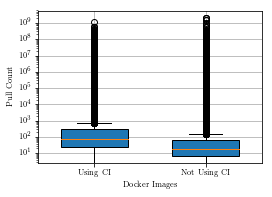

In [7]:
image_pull_count_ci=dockerimage_dataset.query("collection_method=='GitHubCI' or collection_method=='BitbucketCI'")['image_pull_count'].dropna()
image_pull_count_without_ci=dockerimage_dataset.query("collection_method.isnull()")['image_pull_count'].dropna()
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,2.8))
labels = ['Using CI', 'Not Using CI']
data=[image_pull_count_ci,image_pull_count_without_ci]
bplot = ax.boxplot(data,vert=True,patch_artist=True,labels=labels,widths=0.6)
ax.set_yscale('log')
ax.set_ylabel('Pull Count')
ax.set_xlabel('Docker Images')
ax.grid()
fig.savefig(figs_dir+'pull-count-distribution', dpi=300,bbox_inches='tight')
print('The median of pull count of Docker images using CI: ',image_pull_count_ci.median())
print('The median of pull count of Docker images not using CI: ',image_pull_count_without_ci.median())

In [8]:
print('Total number of Docker images in the data set: ',dockerimage_dataset.shape[0])

Total number of Docker images in the data set:  1714947


In [9]:
# All dockerfile number
print('Total number of Dockerfiles in the data set: ',dockerimage_dataset.query("latest_dockerfile.notnull()").shape[0])

Total number of Dockerfiles in the data set:  278502


In [10]:
# from github
print('Total number of Docker images which use CI and have a source repo hosted on GitHub: ',dockerimage_dataset.query("collection_method=='GitHubCI'").shape[0])

Total number of Docker images which use CI and have a source repo hosted on GitHub:  236416


In [11]:
#From bitbucket
print('Total number of Docker images which use CI and have a source repo hosted on Bitbucket: ',dockerimage_dataset.query("collection_method=='BitbucketCI'").shape[0])

Total number of Docker images which use CI and have a source repo hosted on Bitbucket:  18104


In [12]:
print('Total number of Dockerfiles collected through the name matching heuristic: ',dockerimage_dataset.query("collection_method=='NameMatch'").shape[0])

Total number of Dockerfiles collected through the name matching heuristic:  23982


In [13]:
#associate with github
print('Total number of Dockerfiles associated with associated GitHub repos : ',dockerimage_dataset.query("collection_method=='NameMatch'").shape[0]+dockerimage_dataset.query("collection_method=='GitHubCI'").shape[0])

Total number of Dockerfiles associated with associated GitHub repos :  260398


In [14]:
# ic number
print('Total number of Docker images using CI for auto builds: ',dockerimage_dataset.query("collection_method=='BitbucketCI'").shape[0]+dockerimage_dataset.query("collection_method=='GitHubCI'").shape[0])

Total number of Docker images using CI for auto builds:  254520
